In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')

In [ ]:
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

In [ ]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [ ]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [ ]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format="%Y-%m-%d %H:%M:%S")


In [ ]:
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(10).style.background_gradient(cmap='ocean')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
20788,2020-05-26 02:30:00,oZ35aAeoifZaQzV,0.000000,0.000000,0.000000,1660052022.000000,24.750189,23.782251,0.000000
51810,2020-06-10 11:15:00,rrq4fwE8jgrTyWY,0.000000,0.000000,0.000000,0.000000,31.295487,50.575586,0.768491
11209,2020-05-20 15:00:00,WcxssY2VbP4hApt,978.660000,957.006667,7977.333333,181742717.333333,34.696256,49.871641,0.651025
60429,2020-06-14 13:15:00,WcxssY2VbP4hApt,1245.780000,1215.166667,4910.266667,181892909.266667,32.706111,52.174472,0.887381
2655,2020-05-16 06:15:00,oZ35aAeoifZaQzV,49.293333,47.680000,8.200000,1659972155.200000,23.967376,22.682919,0.035180
2112,2020-05-16 00:15:00,4UPUqMRk7TRMgml,0.000000,0.000000,4201.000000,2433212.000000,26.687313,24.529142,0.000000
18833,2020-05-24 23:30:00,81aHJ1q11NBPMrL,0.000000,0.000000,0.000000,0.000000,26.946729,25.541295,0.000000
8267,2020-05-18 22:00:00,q49J1IKaHRwDQnt,0.000000,0.000000,4161.000000,362440.000000,26.305780,24.966905,0.000000
66916,2020-06-17 15:00:00,Qf4GUc1pJu5T6c6,578.753333,567.186667,3599.600000,838645877.600000,27.227575,29.347517,0.363449
75,2020-05-15 00:45:00,PeE6FRyGXUgsRhN,0.000000,0.000000,0.000000,1348350801.000000,26.500589,24.420678,0.000000


In [ ]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month



# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_NUMBER,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,1,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,3,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,4,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


In [ ]:
df_solar['DATE'].nunique()

34

In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   SOURCE_KEY_NUMBER    67698 non-null  int64         
 10  DATE                 67698 non-null  object        
 11  TIME                 67698 non-null  object        
 12  DAY                  67698 non-null  int32         
 13  MONTH                67698 non-

In [ ]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
SOURCE_KEY_NUMBER      0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [ ]:
df_solar.describe().style.background_gradient(cmap='turbo')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_NUMBER,DAY,MONTH,MINUTES,TOTAL MINUTES PASS
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,10.462658,15.530680,5.529705,22.517061,714.329522
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,5.000000,9.000000,5.000000,15.000000,360.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,11.000000,16.000000,6.000000,30.000000,720.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,16.000000,22.000000,6.000000,45.000000,1080.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,21.000000,31.000000,6.000000,45.000000,1425.000000
std,nan,370.569597,362.112118,2919.448386,729667771.073241,4.021294,11.226446,0.309365,6.357865,8.527546,0.499120,16.764084,415.672274


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar['TOTAL_YIELD'] = encoder.fit_transform(df_solar['TOTAL_YIELD'])

df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_NUMBER,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,4712,27.004764,25.060789,0.0,0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,22409,27.004764,25.060789,0.0,1,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,31614,27.004764,25.060789,0.0,2,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1659,27.004764,25.060789,0.0,3,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,7924,27.004764,25.060789,0.0,4,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


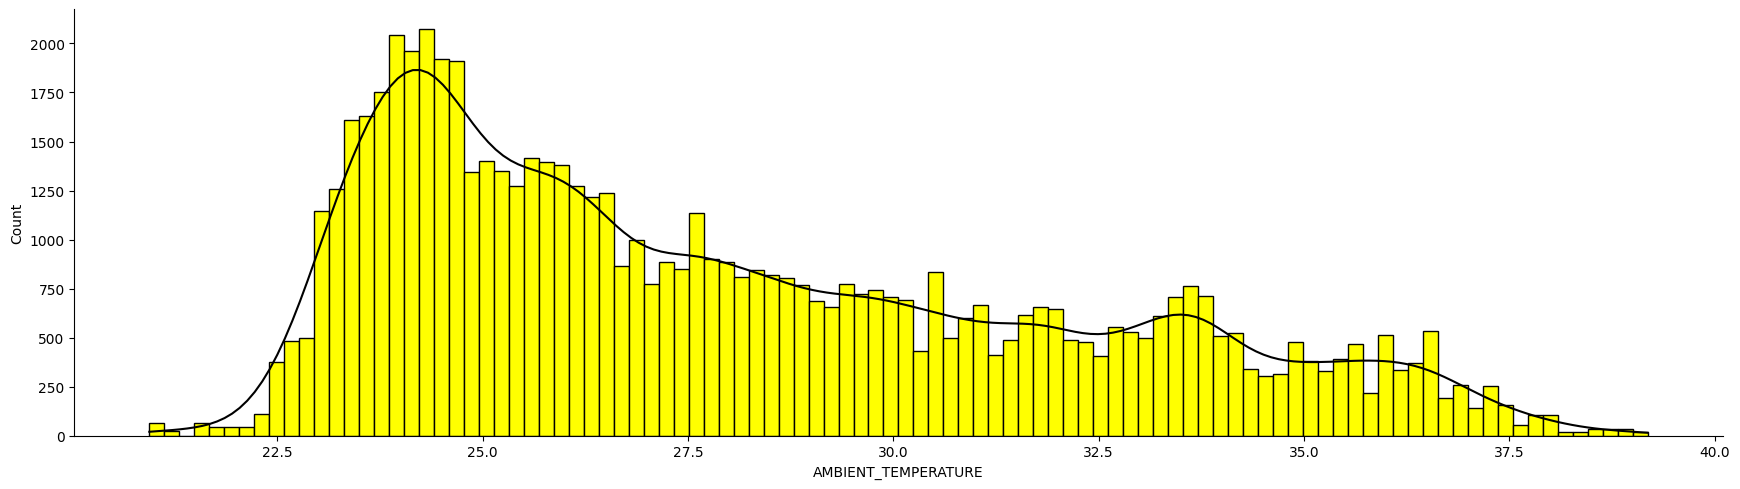

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "black", facecolor = "yellow",height = 5, aspect = 3.5);

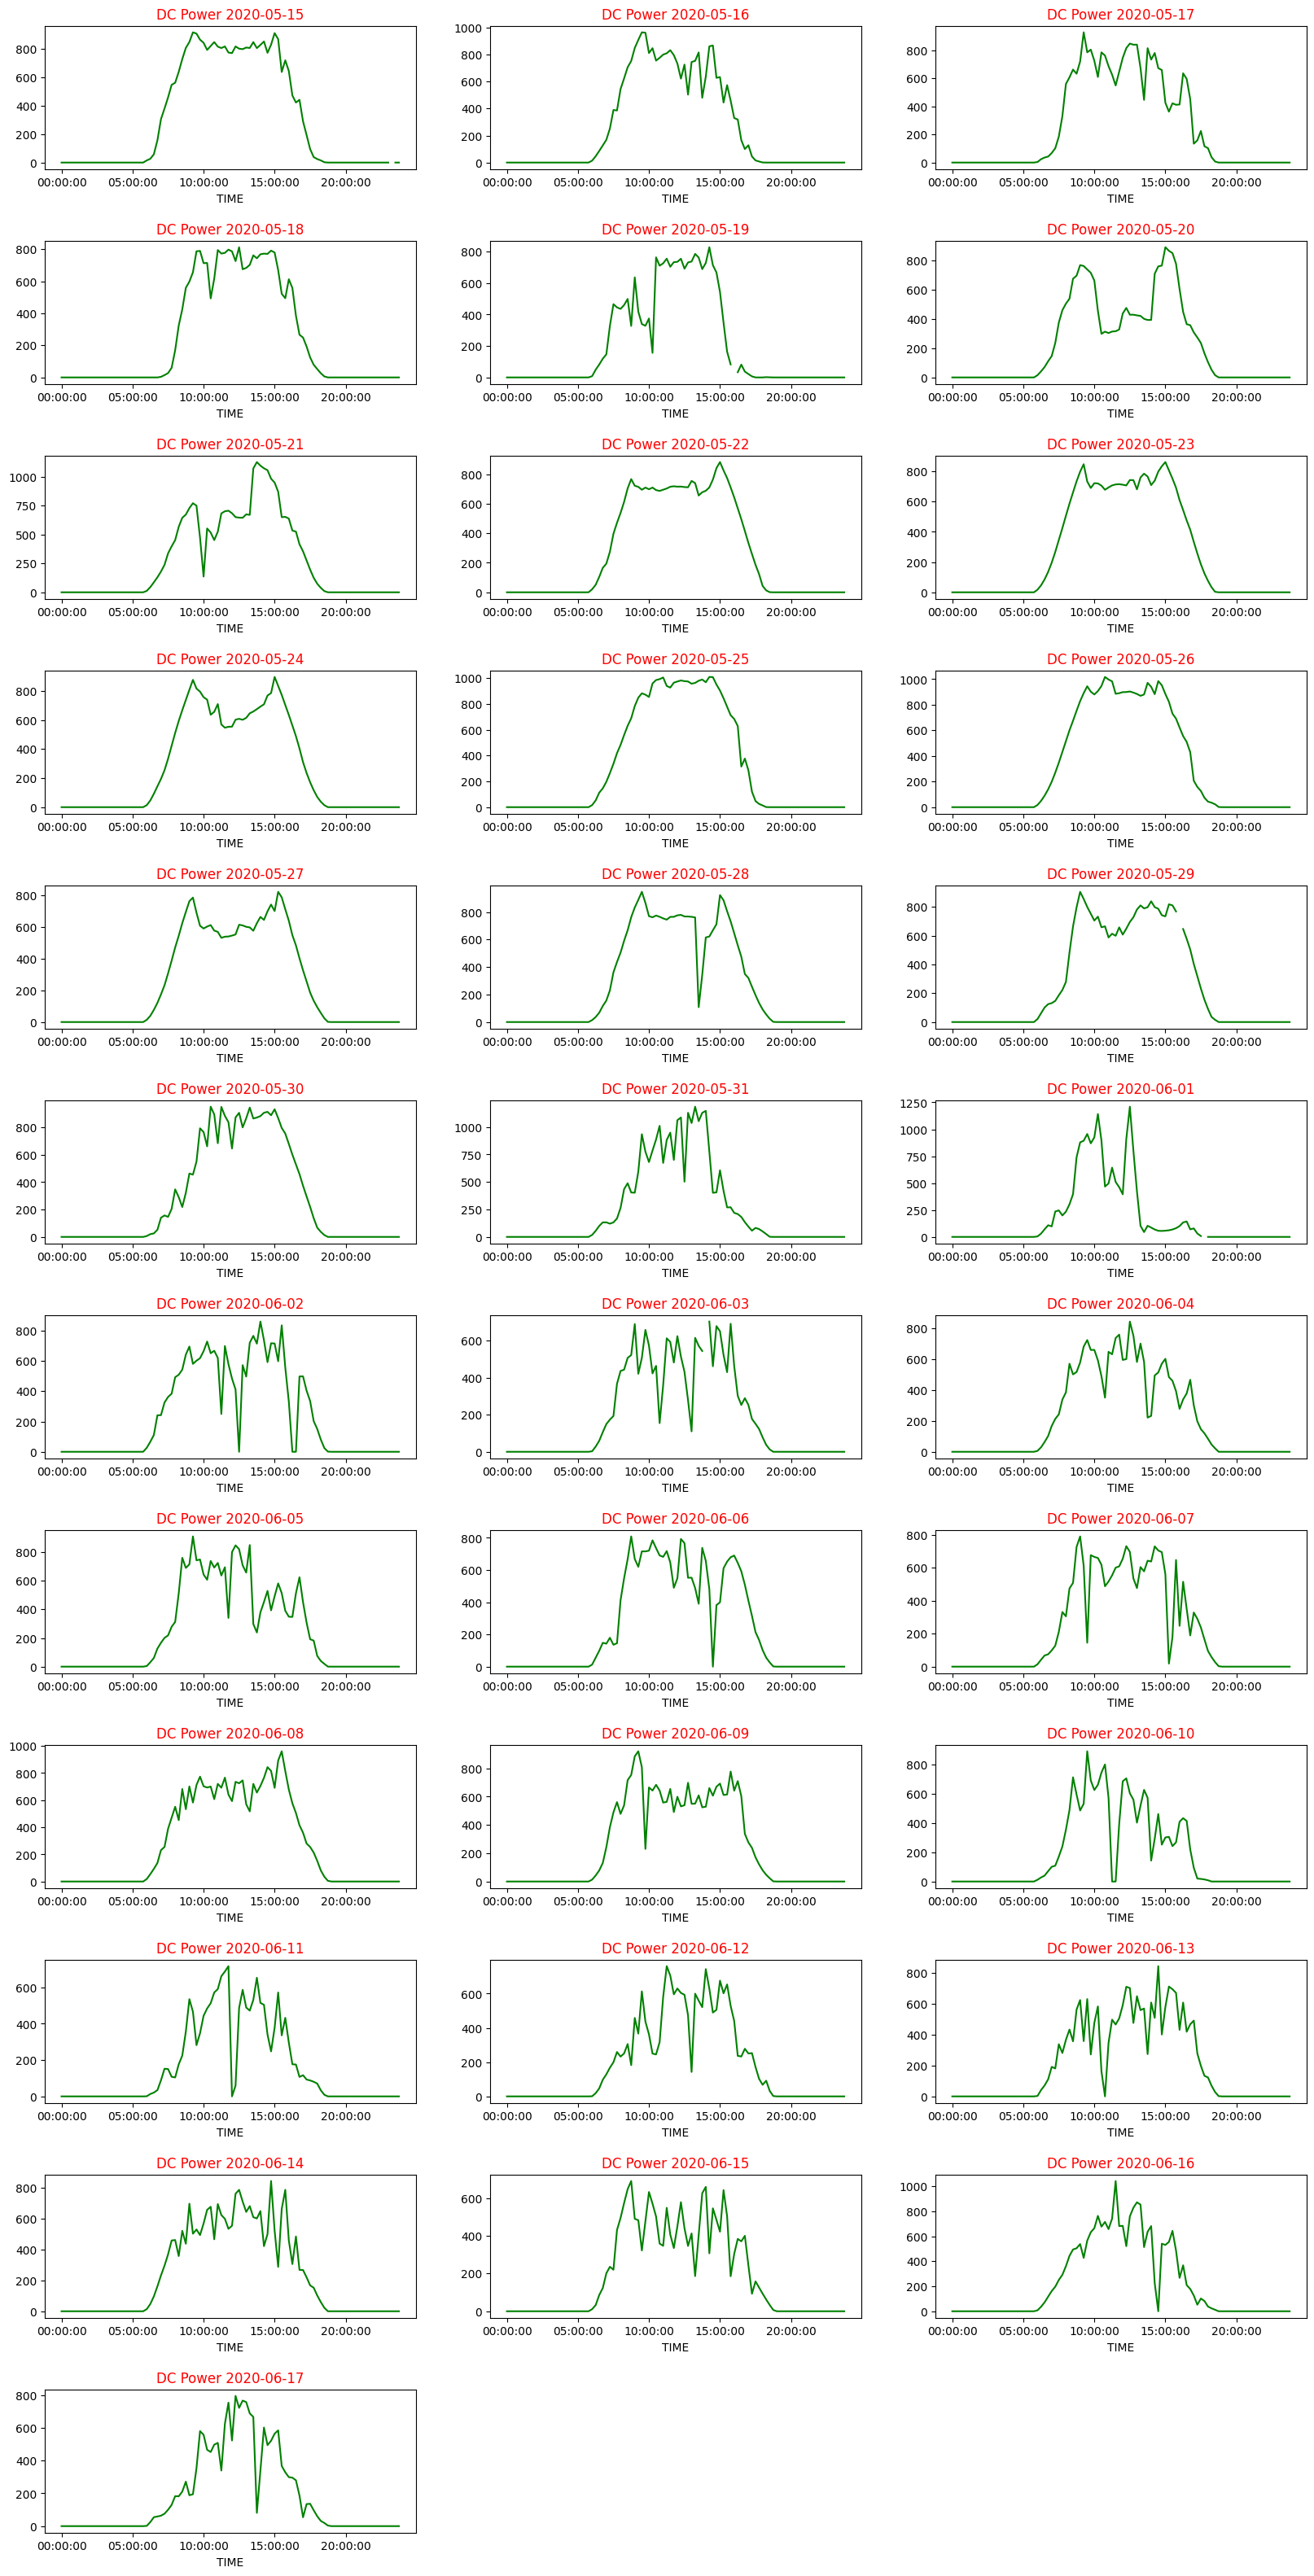

In [ ]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='green')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')

Daywise_plot(data=solar_dc, row=12, col=3)

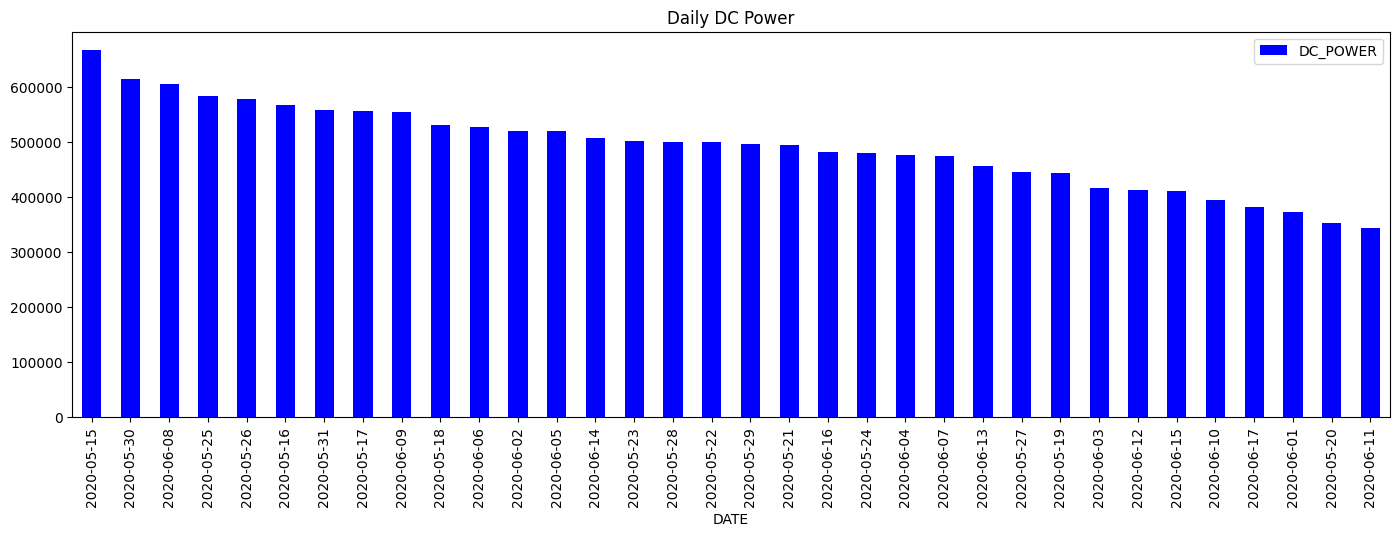

In [ ]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('Daily DC Power')
plt.show()

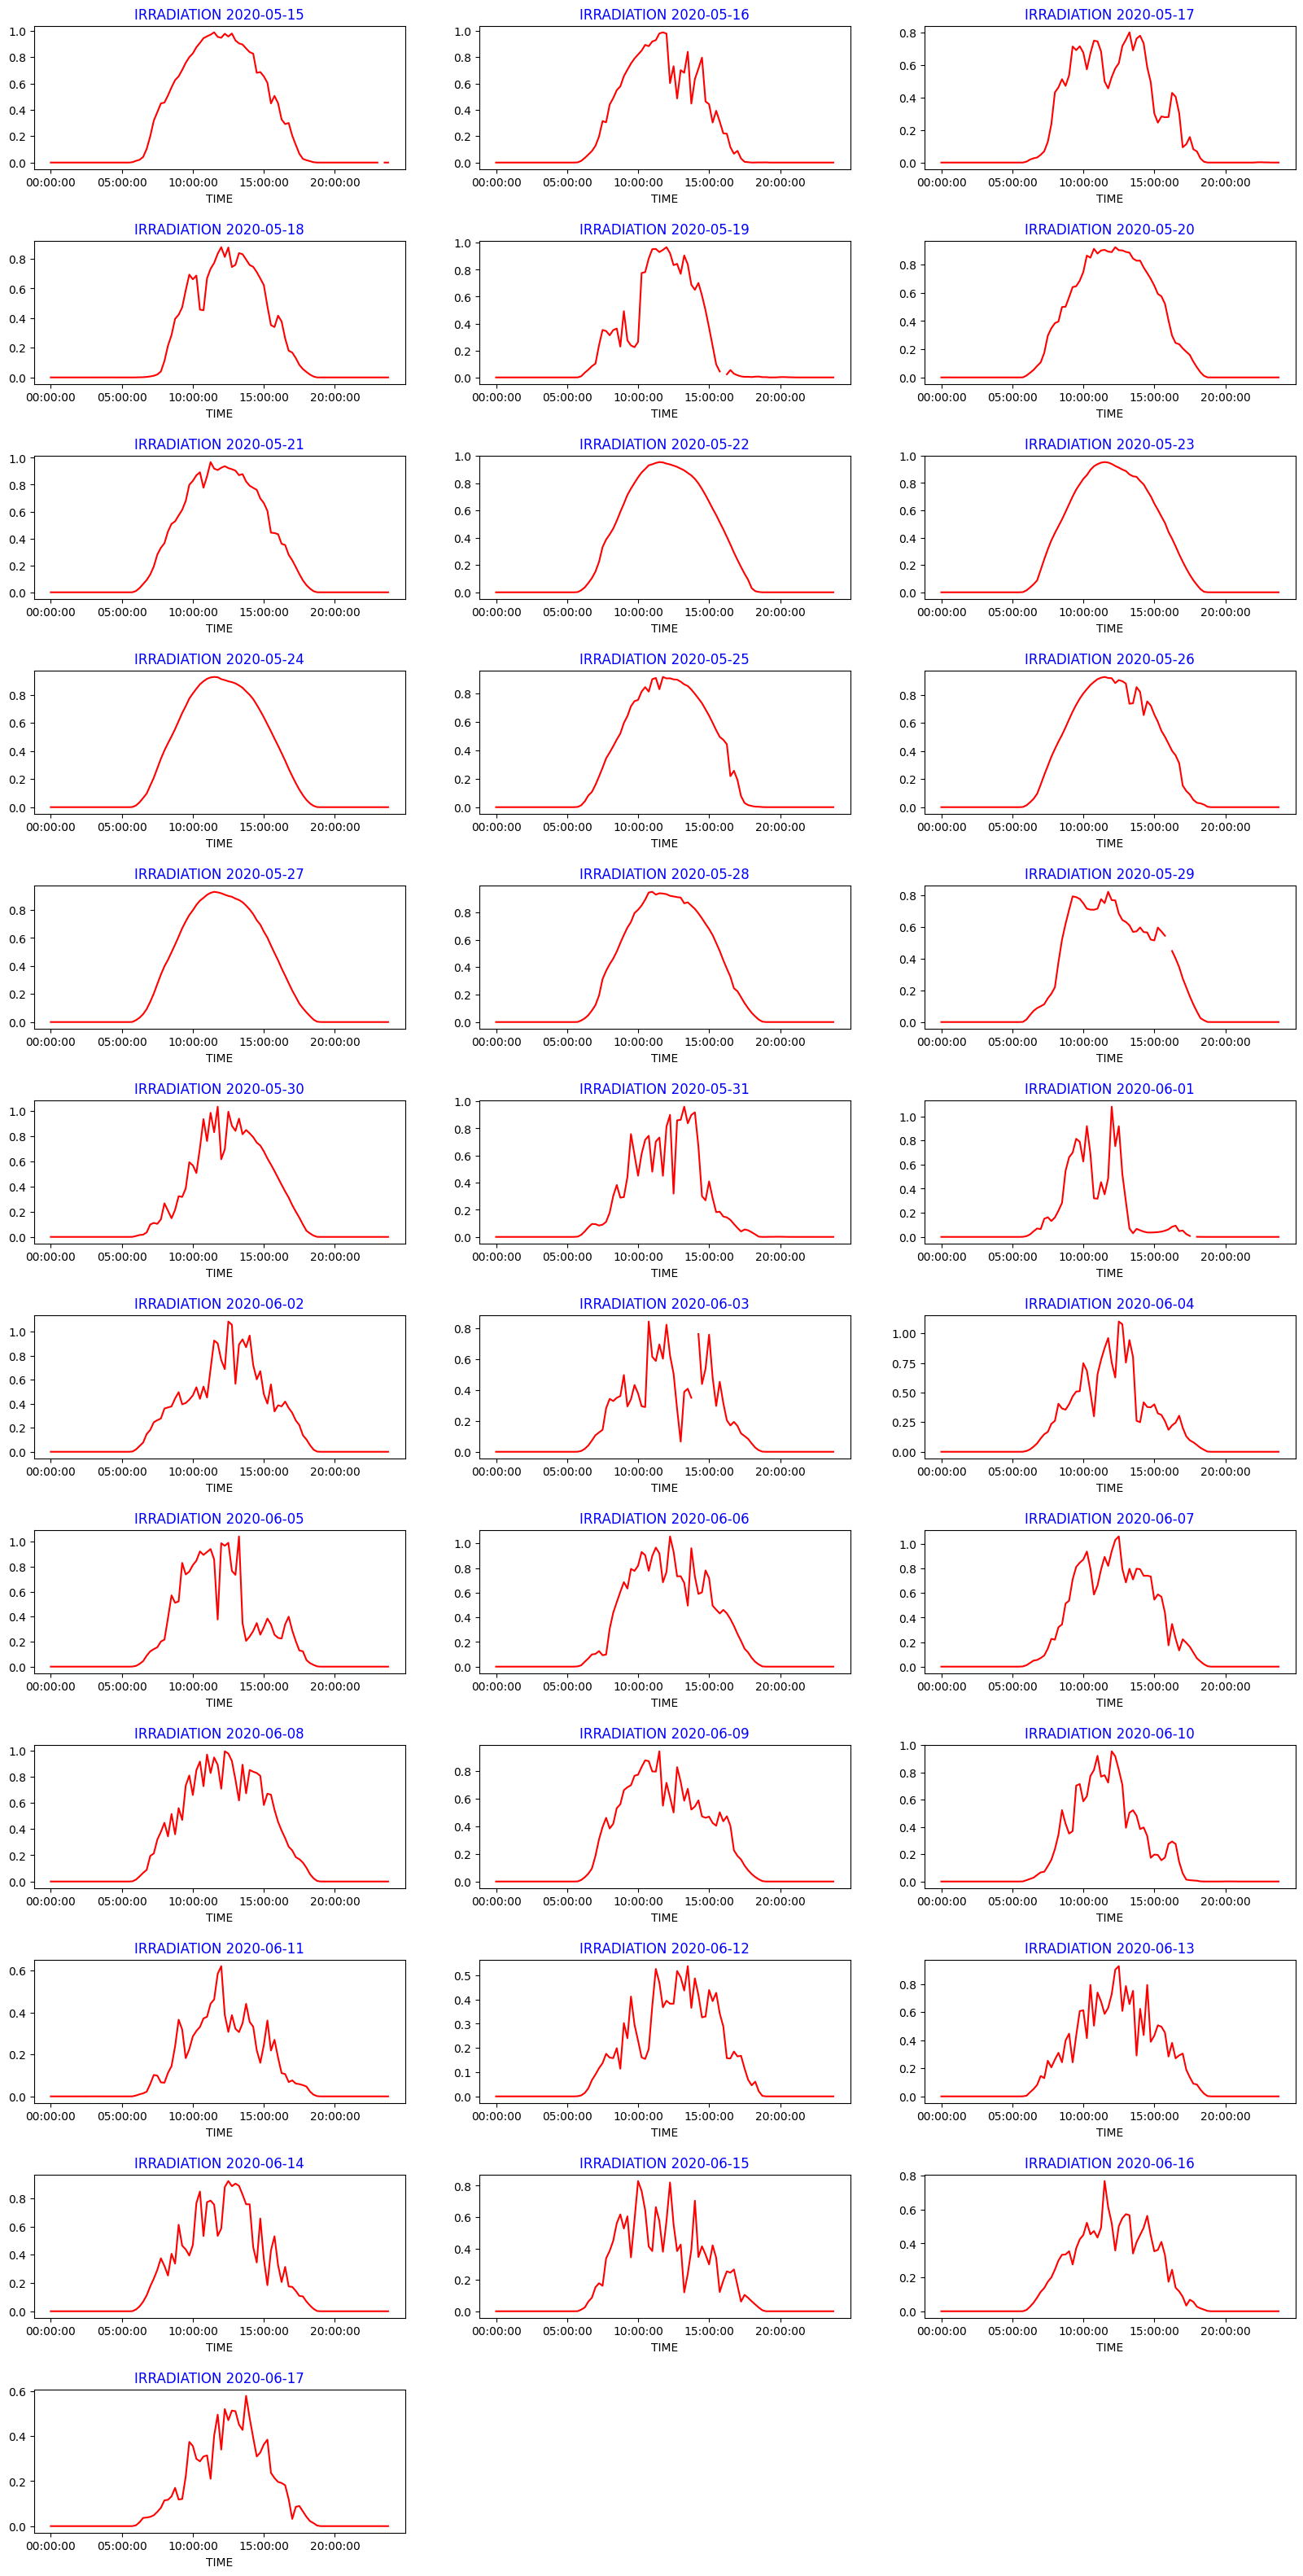

In [ ]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

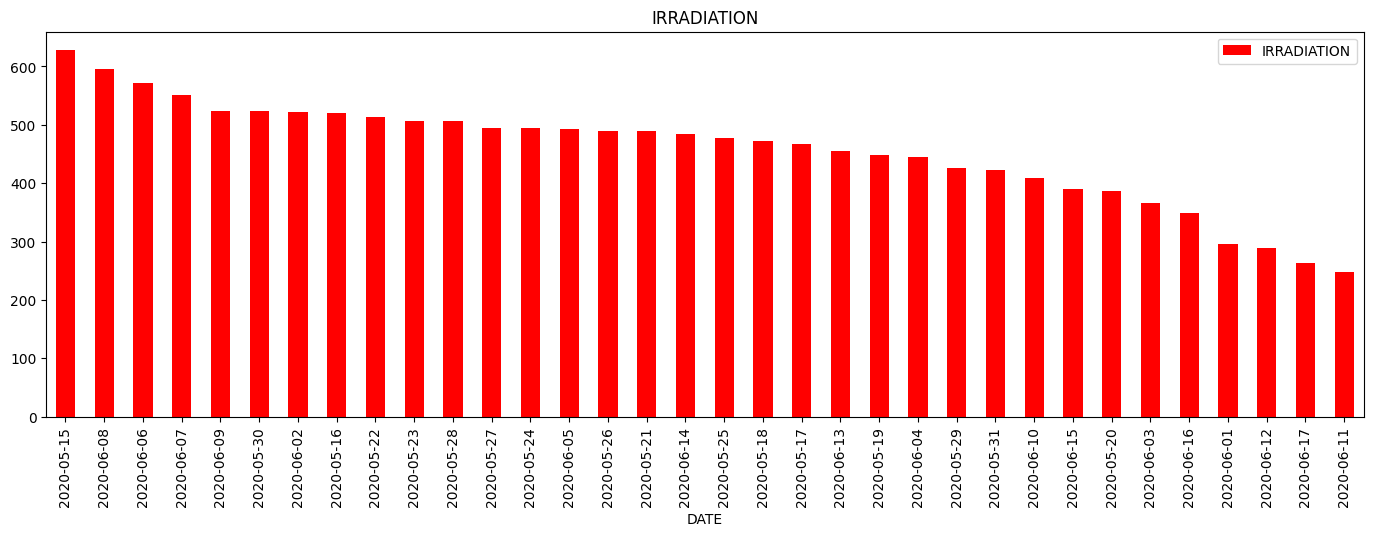

In [ ]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('IRRADIATION')
plt.show()

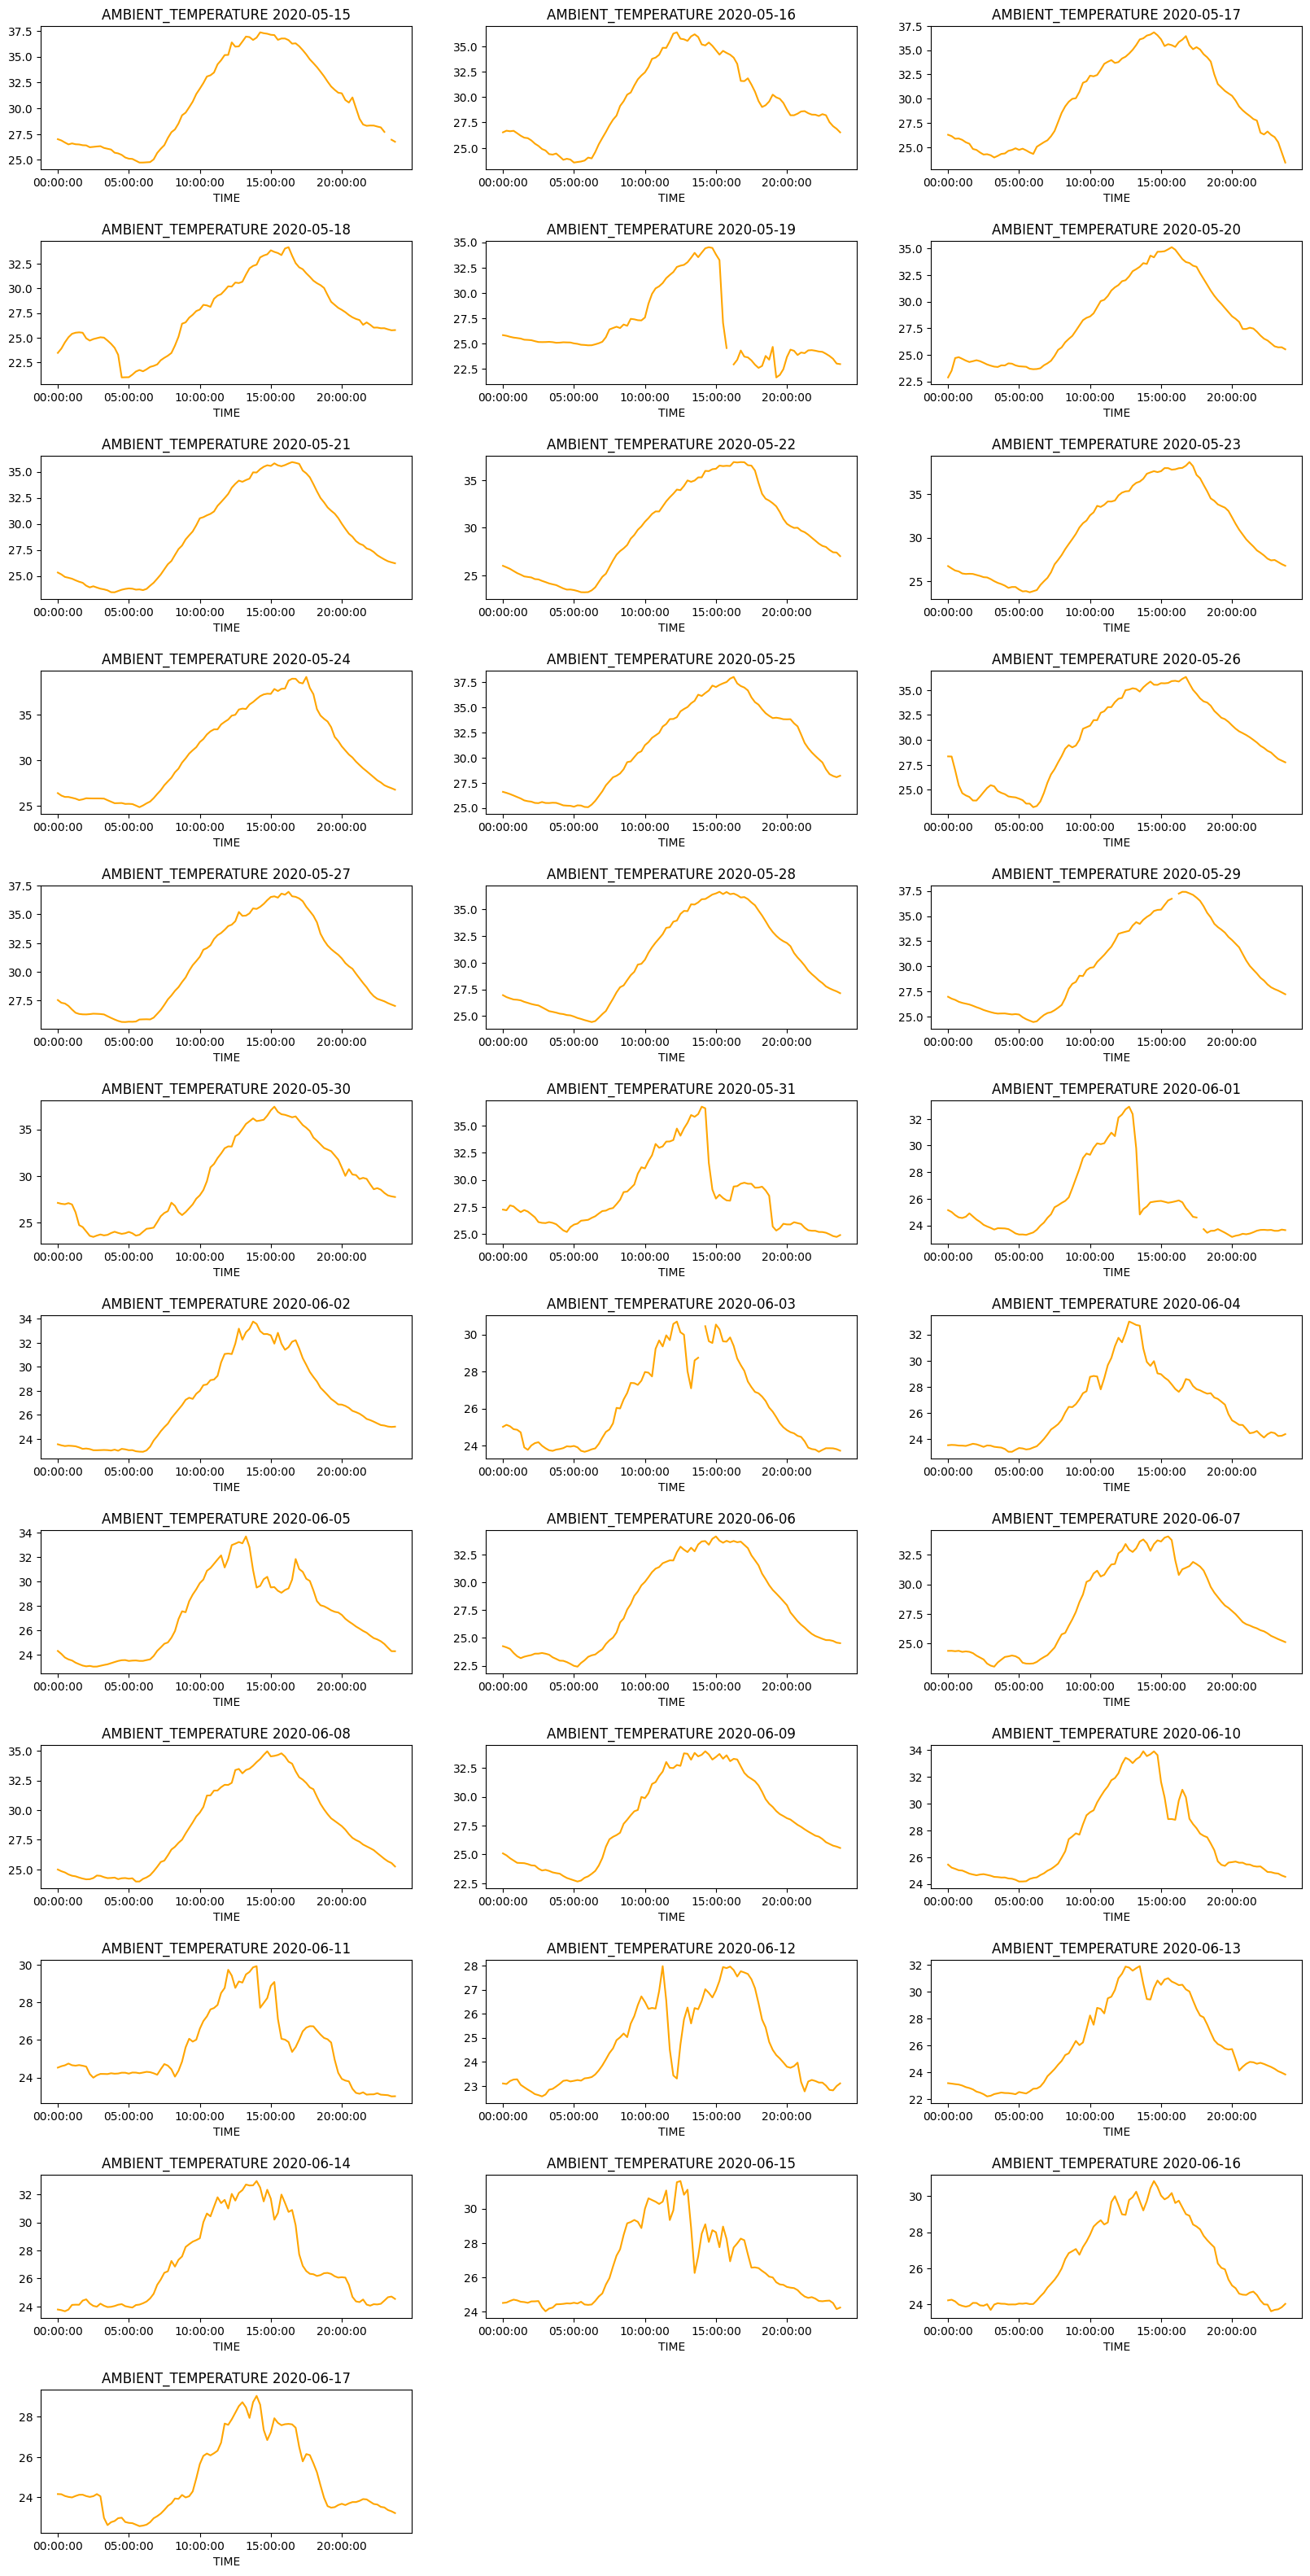

In [ ]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='orange')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='black')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

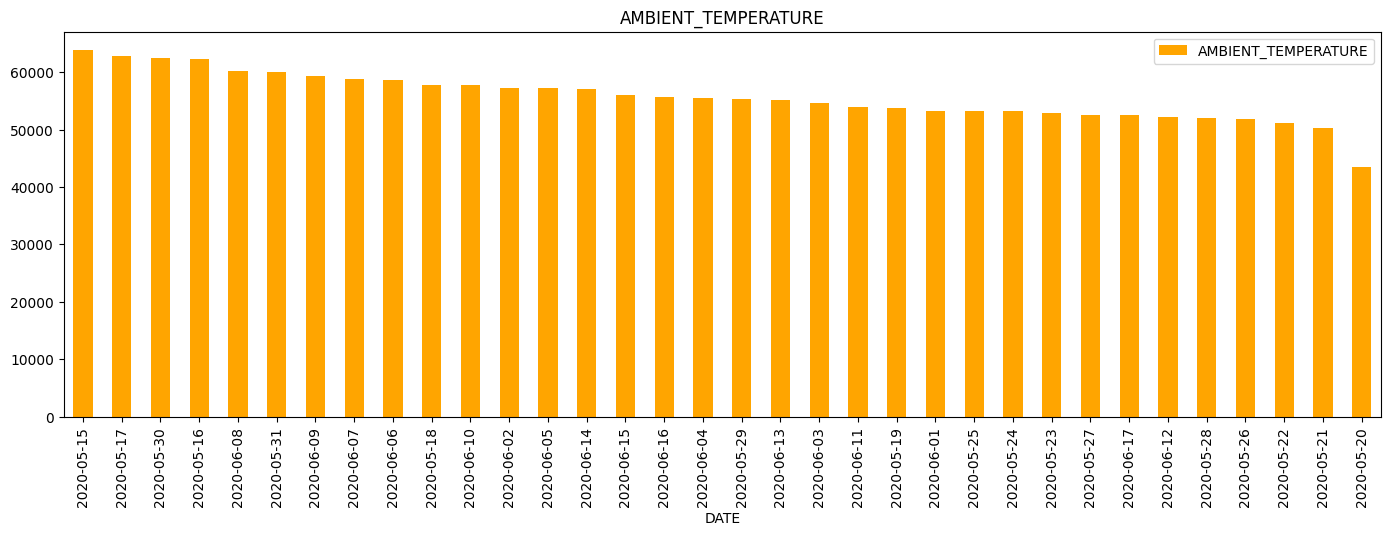

In [ ]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='orange')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

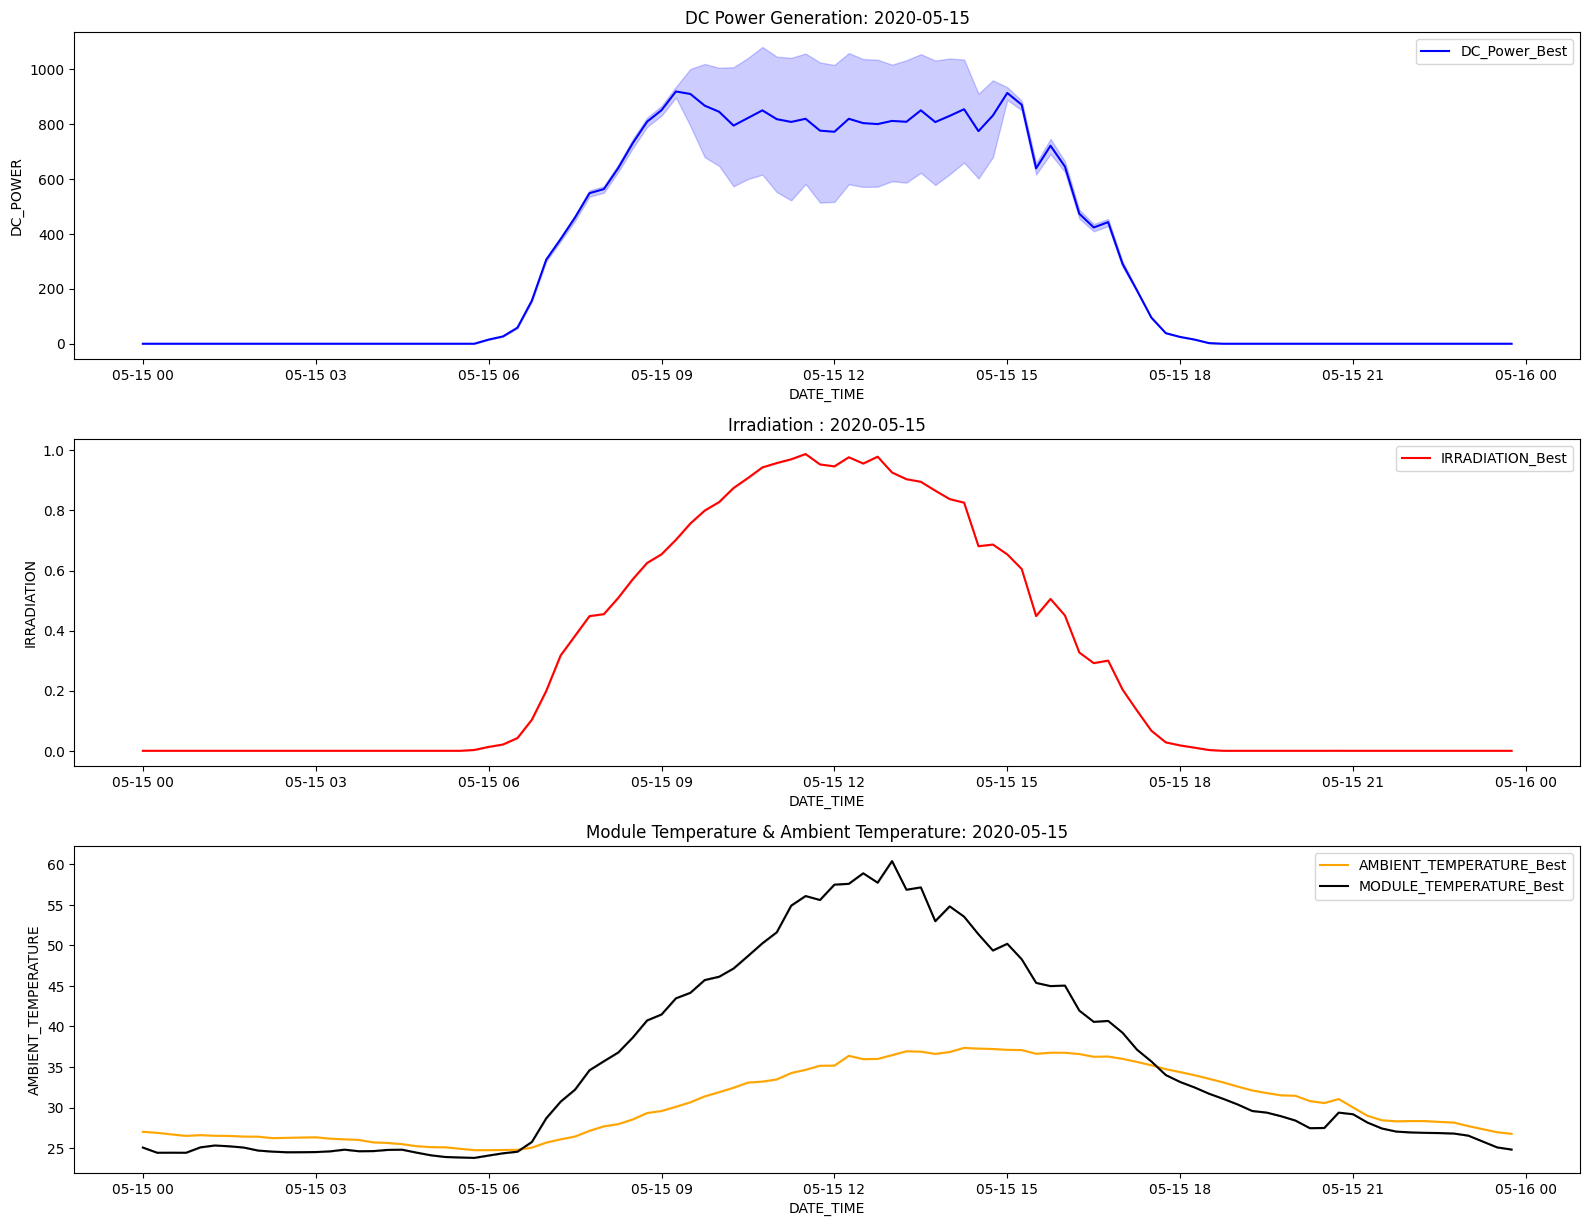

In [ ]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="DC_POWER", label="DC_Power_Best",color='blue');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="IRRADIATION", label="IRRADIATION_Best",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="AMBIENT_TEMPERATURE", label="AMBIENT_TEMPERATURE_Best",color='orange');
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="MODULE_TEMPERATURE", label="MODULE_TEMPERATURE_Best",color='black');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

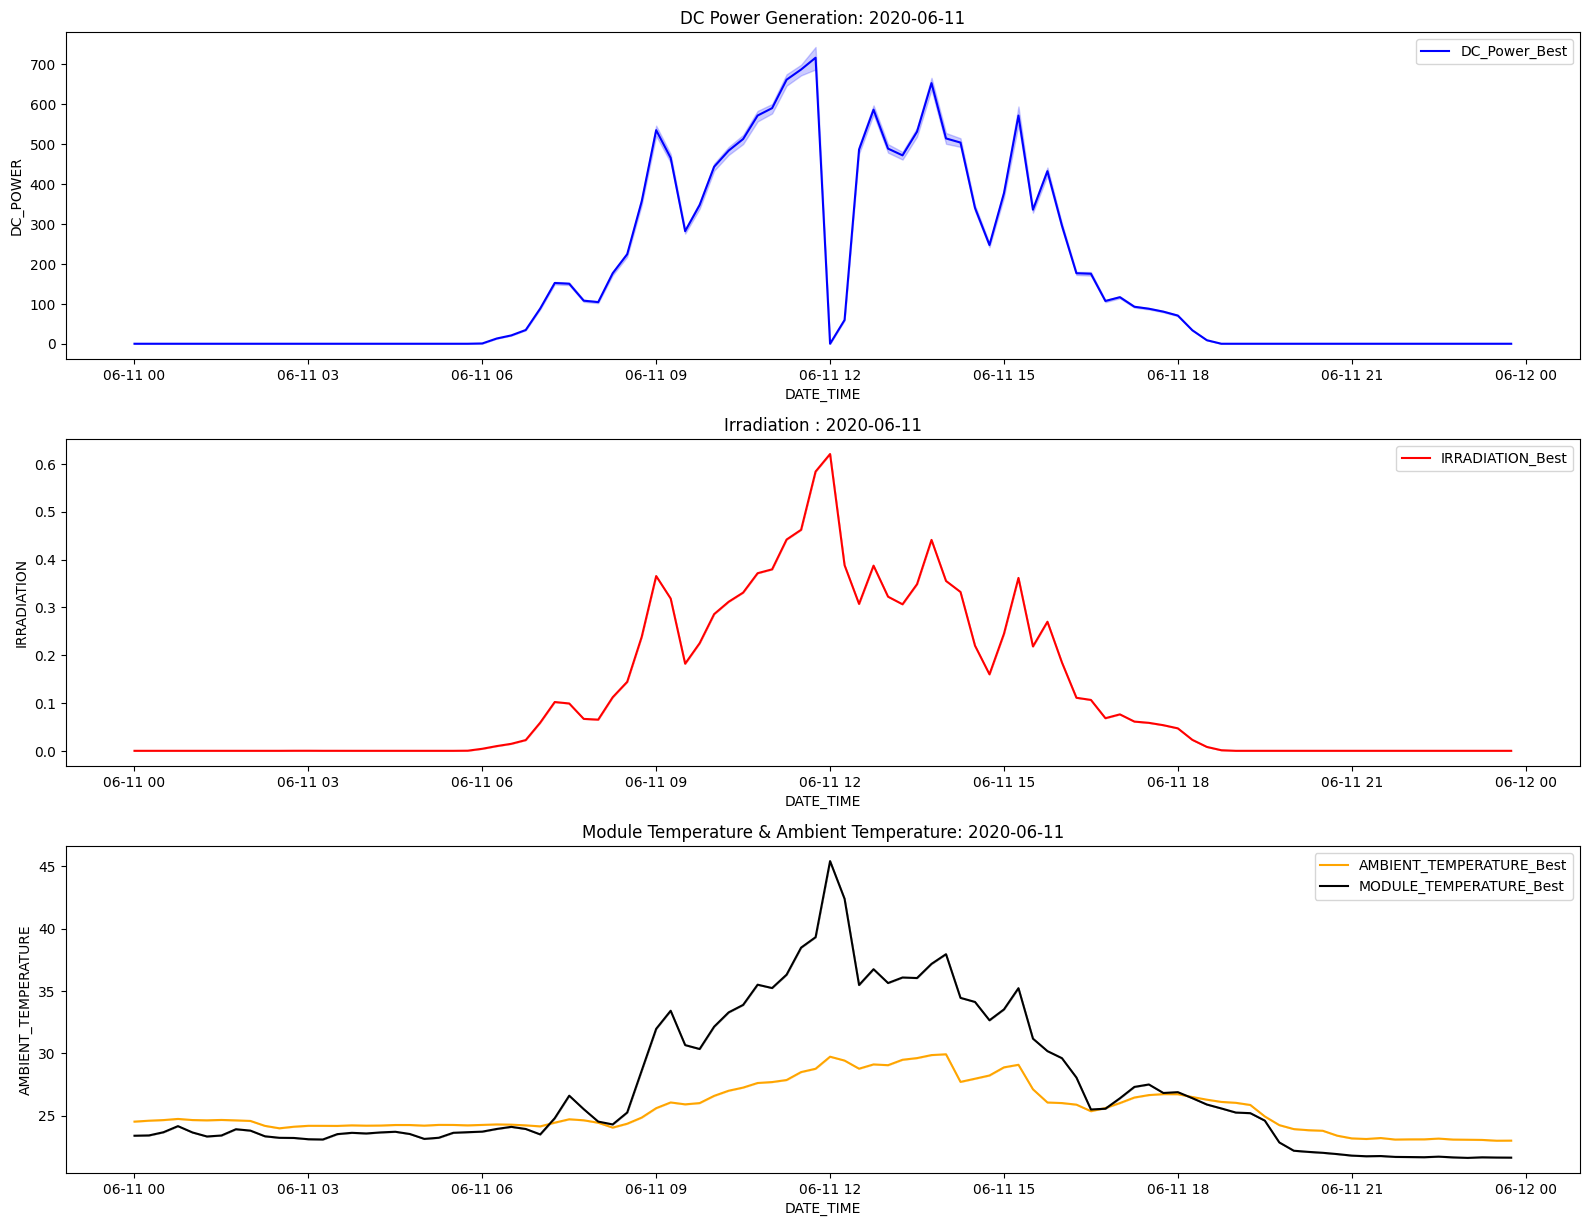

In [ ]:
plt.figure(figsize=(16,16))

date=["2020-06-11"]

plt.subplot(411)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="DC_POWER", label="DC_Power_Best",color='blue');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="IRRADIATION", label="IRRADIATION_Best",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="AMBIENT_TEMPERATURE", label="AMBIENT_TEMPERATURE_Best",color='orange');
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="MODULE_TEMPERATURE", label="MODULE_TEMPERATURE_Best",color='black');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

In [ ]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [ ]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)



32036

In [ ]:
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

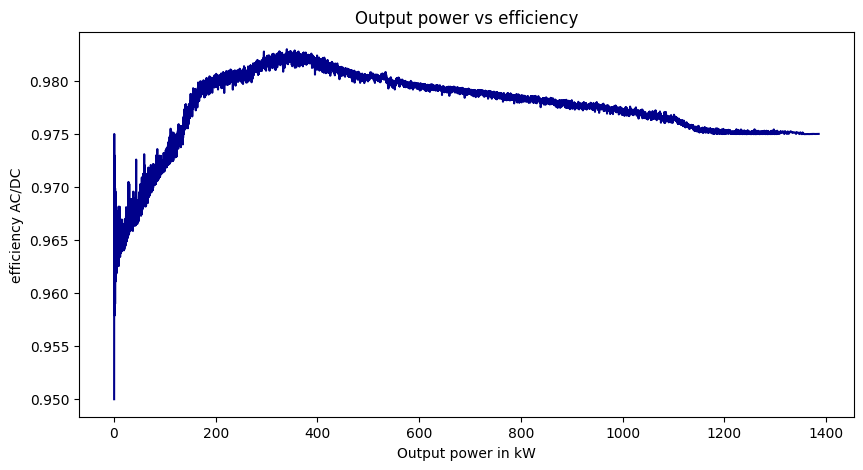

In [ ]:
plt.figure(figsize=(10,5))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='darkblue')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

In [ ]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000000,4712,27.004764,25.060789,0.0,0.0
1,0.000000,22409,27.004764,25.060789,0.0,0.0
2,3075.333333,31614,27.004764,25.060789,0.0,0.0
3,269.933333,1659,27.004764,25.060789,0.0,0.0
4,3177.000000,7924,27.004764,25.060789,0.0,0.0


In [ ]:
y.sample(5)

49257     42.186667
10105      0.000000
39837      0.000000
4126       0.000000
56043    663.533333
Name: AC_POWER, dtype: float64

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

# Calculate mean, median, and standard deviation
mean_value = np.mean(X)
median_value = np.median(X)
std_deviation = np.std(X)

# Calculate skewness and kurtosis
skewness = skew(X)
kurt = kurtosis(X)


# Print summary statistics
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 3355.9125332921735
Median: 29.479894833333333
Standard Deviation: DAILY_YIELD            2919.426823
TOTAL_YIELD            9710.844557
AMBIENT_TEMPERATURE       4.021264
MODULE_TEMPERATURE       11.226363
IRRADIATION               0.309363
DC_POWER                370.566860
dtype: float64
Skewness: [ 0.48916116 -0.01819406  0.66413942  0.97525103  1.08454344  1.37405365]
Kurtosis: [-0.96284379 -1.20715879 -0.64555738 -0.3304648  -0.25292378  0.63056855]


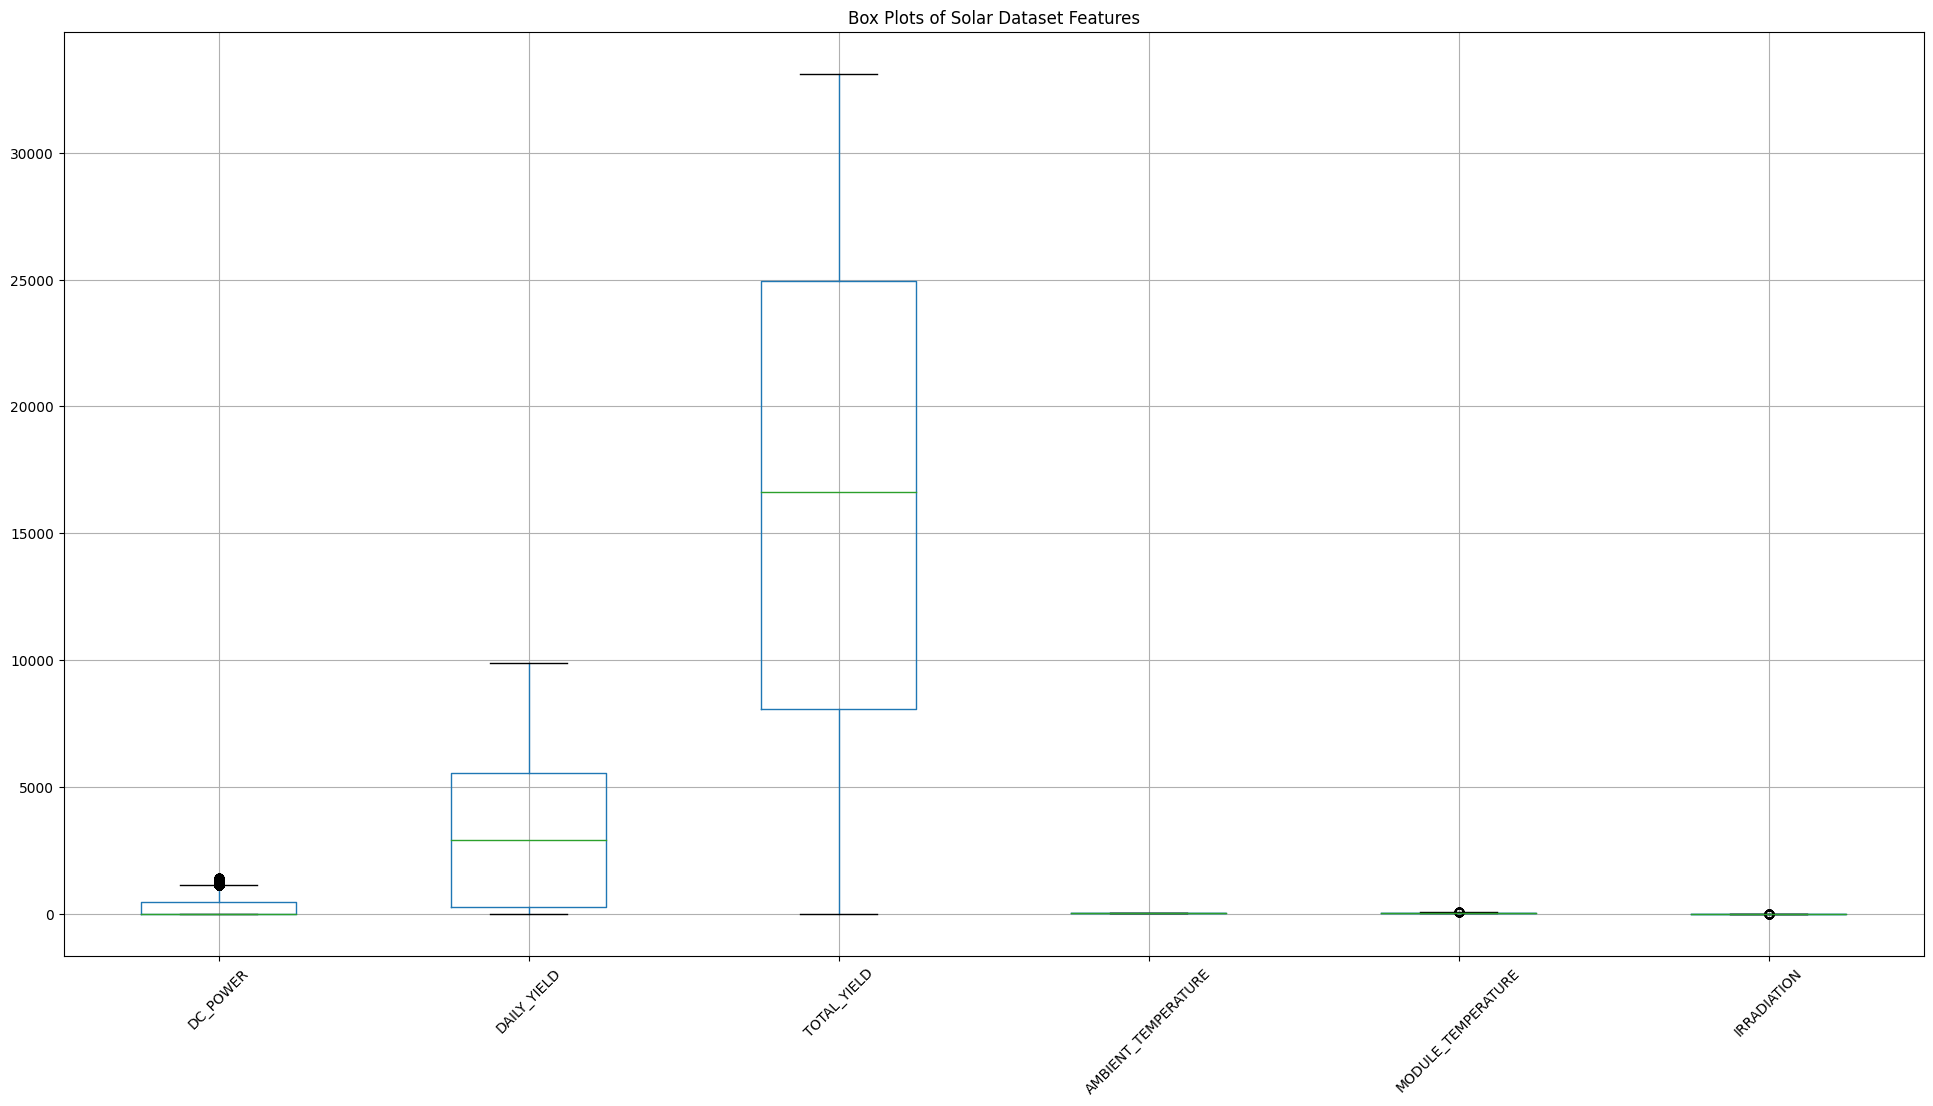

Indices of potential outliers:
DC_POWER: [ 9486  9489 35050 35051 35052 35053 35054 35055 35056 35057 35058 35059
 35060 35061 35062 35063 35064 35065 35066 35067 35068 35069 35070 35071
 35164 39230 39234 39238 39247 39248 39250 41302 41306 41318 41320 41324
 41327 41328 41330 41334 41340 41349 41408 41409 41412 41415 41416 41418
 41423 41424 41428 43432 43433 43434 43439 43445 43447 43452 43454 43464
 43468 43571 43579 45550 45553 45560 45565 47550 47598 47679 47690 51895
 60415]
DAILY_YIELD: [5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


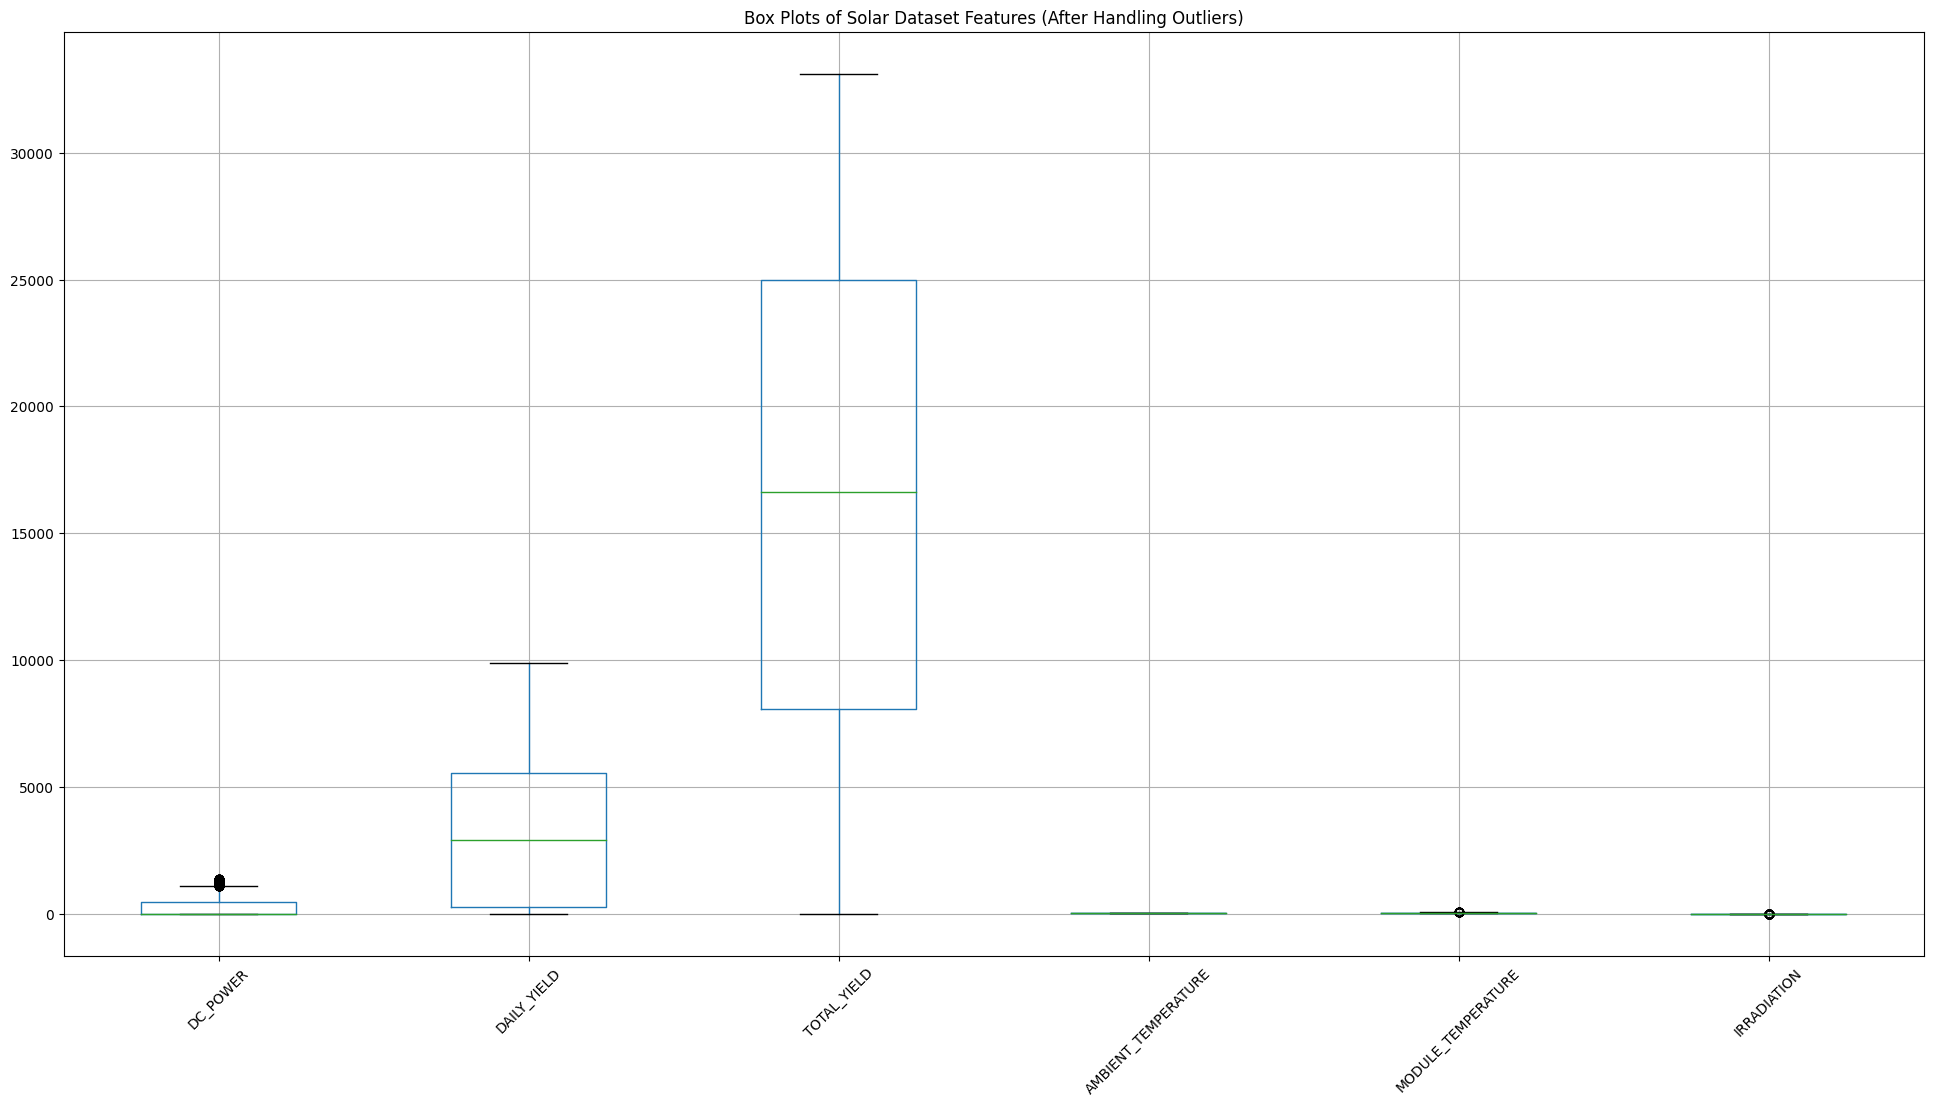

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

# Load the diabetes dataset

column_names = [ "DC_POWER", "DAILY_YIELD", "TOTAL_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]


# Visualize potential outliers using box plots
plt.figure(figsize=(24, 12))
X.boxplot(column=column_names)
plt.title("Box Plots of Solar Dataset Features")
plt.xticks(rotation=45)
plt.show()


# Calculate the z-scores
z_scores = np.abs(stats.zscore(X))

# Identify potential outliers
threshold = 3  # Adjust this threshold as needed
outlier_indices = np.where(z_scores > threshold)

# Print the indices of potential outliers
print("Indices of potential outliers:")
for feature, indices in zip(column_names, outlier_indices):print(f"{feature}: {indices}")

# Decide on appropriate strategies for handling outliers
# For example, you can remove the rows with outliers:
X_no_outliers = X[(z_scores <= threshold).all(axis=1)]

# Alternatively, you can transform the outliers, e.g., using a log transformation:
# df[column_names] = np.log1p(df[column_names])
# Recheck the dataset to ensure outliers have been properly handled

plt.figure(figsize=(24, 12))
X_no_outliers.boxplot(column=column_names)
plt.title("Box Plots of Solar Dataset Features (After Handling Outliers)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression().fit(X_train, y_train)
prediction=lr_clf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 Scorer:", r2_score(y_test,prediction))
print("MAE:", mean_absolute_error(y_test,prediction))
print("MSE:", mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt (mean_squared_error(y_test,prediction)))

R2 Scorer: 0.9999941387410877
MAE: 0.5937164456344309
MSE: 0.7571609374371457
RMSE: 0.8701499511217281


In [ ]:
#hyperperameter tunning
model = LinearRegression(fit_intercept=False, copy_X=False, n_jobs=-1, positive=True).fit(X_train, y_train)
predictions=model.predict(X_test)
print("R2 Scorer:", r2_score(y_test,prediction))
print("MAE:", mean_absolute_error(y_test,prediction))
print("MSE:", mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt (mean_squared_error(y_test,prediction)))

R2 Scorer: 0.9999941387410877
MAE: 0.5937164456344309
MSE: 0.7571609374371457
RMSE: 0.8701499511217281


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
fit_intercept=[False]
copy_X=[False]
n_jobs=[1, -1]
positive= [True]
# Create the random grid
random_grid = {'n_jobs': n_jobs,
               'fit_intercept': fit_intercept,
               'copy_x': copy_X,
               'positive': positive

}
print(random_grid)

{'n_jobs': [1, -1], 'fit_intercept': [False], 'copy_x': [False], 'positive': [True]}


## **Support Vector Regression**

In [154]:
from sklearn.svm import SVR
svr_clf = SVR().fit(X_train, y_train)
prediction=svr_clf.predict(X_test)

In [156]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 Scorer:", r2_score(y_test,prediction))
print("MAE:", mean_absolute_error(y_test,prediction))
print("MSE:", mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt (mean_squared_error(y_test,prediction)))

R2 Scorer: -0.26694318412510487
MAE: 226.1408704041231
MSE: 163664.4794786404
RMSE: 404.5546680964643


In [157]:
#hyperperameter tunning
model = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1).fit(X_train, y_train)
predictions=model.predict(X_test)
print("R2 Scorer:", r2_score(y_test,prediction))
print("MAE:", mean_absolute_error(y_test,prediction))
print("MSE:", mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt (mean_squared_error(y_test,prediction)))

R2 Scorer: -0.26694318412510487
MAE: 226.1408704041231
MSE: 163664.4794786404
RMSE: 404.5546680964643
